The goal of this notebook is to format the data in a compact notebook and perform statistical analysis

In [1]:
import os 
import copy
import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from importlib import reload
import fxsdata
from fxsdata import fxs_mouse

In [2]:
%matplotlib notebook
#%matplotlib inline

In [3]:
num_queries = 4 
query_names = ['Synapsin, PSD95', 'Synapsin, VGluT1, PSD95', 'Synapsin, VGluT2, PSD95', 'Synapsin, VGluT1, VGluT2, PSD95']
region_names = ['F000', 'F001', 'F002', 'F003']
layer_names = ['Layer1', 'Layer2', 'Layer3', 'Layer4']
z_spans = [1, 2, 3]
style_name = 'seaborn-whitegrid'
xticklabels = ['2ss v 3ss', '4ss v 6ss', '5ss v 7ss', '2ss (second) v 1ss']
plot_titles = query_names
row_labels = ['Q0', 'Q1', 'Q2', 'Q3']

Load data into fxs_mouse objects 

In [4]:
list_of_mice = []
mice_dict = {} 

name = '2ss'
fn = '/Users/anish/Documents/yi_mice/excel/2ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
astro_mouse_2ss = fxs_mouse(name)
astro_mouse_2ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_2ss)
mice_dict[name] = astro_mouse_2ss

name = '3ss'
fn = '/Users/anish/Documents/yi_mice/excel/3ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'KO'
astro_mouse_3ss = fxs_mouse(name)
astro_mouse_3ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_3ss)
mice_dict[name] = astro_mouse_3ss


name = '4ss'
fn = '/Users/anish/Documents/yi_mice/excel/4ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
astro_mouse_4ss = fxs_mouse(name)
astro_mouse_4ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_4ss)
mice_dict[name] = astro_mouse_4ss


name = '5ss'
fn = '/Users/anish/Documents/yi_mice/excel/5ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
astro_mouse_5ss = fxs_mouse(name)
astro_mouse_5ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_5ss)
mice_dict[name] = astro_mouse_5ss


name = '6ss'
fn = '/Users/anish/Documents/yi_mice/excel/6ss_fragX_excitatory_astro.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
astro_mouse_6ss = fxs_mouse(name)
astro_mouse_6ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_6ss)
mice_dict[name] = astro_mouse_6ss


name = '7ss'
fn = '/Users/anish/Documents/yi_mice/excel/7ss_fragX_excitatory_astro.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
astro_mouse_7ss = fxs_mouse(name)
astro_mouse_7ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_7ss)
mice_dict[name] = astro_mouse_7ss


name = '1ss'
fn = '/Users/anish/Documents/yi_mice/excel/1ss_fragX_excitatory_astro.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
astro_mouse_1ss = fxs_mouse(name)
astro_mouse_1ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_1ss)
mice_dict[name] = astro_mouse_1ss


name = '22ss'
fn = '/Users/anish/Documents/yi_mice/excel/22ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
astro_mouse_22ss = fxs_mouse(name)
astro_mouse_22ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_22ss)
mice_dict[name] = astro_mouse_22ss


# Add small synapses (1slice-2slice to the calculations)
astro_mouse_2ss = fxsdata.compute_small_synapses(astro_mouse_2ss)
astro_mouse_3ss = fxsdata.compute_small_synapses(astro_mouse_3ss)
astro_mouse_4ss = fxsdata.compute_small_synapses(astro_mouse_4ss)
astro_mouse_5ss = fxsdata.compute_small_synapses(astro_mouse_5ss)
astro_mouse_6ss = fxsdata.compute_small_synapses(astro_mouse_6ss)
astro_mouse_7ss = fxsdata.compute_small_synapses(astro_mouse_7ss)
astro_mouse_1ss = fxsdata.compute_small_synapses(astro_mouse_1ss)
astro_mouse_22ss = fxsdata.compute_small_synapses(astro_mouse_22ss)


# Add medium synapses (1slice-2slice to the calculations)
astro_mouse_2ss = fxsdata.compute_medium_synapses(astro_mouse_2ss)
astro_mouse_3ss = fxsdata.compute_medium_synapses(astro_mouse_3ss)
astro_mouse_4ss = fxsdata.compute_medium_synapses(astro_mouse_4ss)
astro_mouse_5ss = fxsdata.compute_medium_synapses(astro_mouse_5ss)
astro_mouse_6ss = fxsdata.compute_medium_synapses(astro_mouse_6ss)
astro_mouse_7ss = fxsdata.compute_medium_synapses(astro_mouse_7ss)
astro_mouse_1ss = fxsdata.compute_medium_synapses(astro_mouse_1ss)
astro_mouse_22ss = fxsdata.compute_medium_synapses(astro_mouse_22ss)





36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
36 48
24 36
12 24
0 12


In [5]:
# Create dataframes 
df_2 = fxsdata.create_df(astro_mouse_2ss, row_labels)
df_3 = fxsdata.create_df(astro_mouse_3ss, row_labels)

df_4 = fxsdata.create_df(astro_mouse_4ss, row_labels)
df_6 = fxsdata.create_df(astro_mouse_6ss, row_labels)

df_5 = fxsdata.create_df(astro_mouse_5ss, row_labels)
df_7 = fxsdata.create_df(astro_mouse_7ss, row_labels)

df_22 = fxsdata.create_df(astro_mouse_22ss, row_labels)
df_1 =  fxsdata.create_df(astro_mouse_1ss, row_labels)

In [6]:
dflist = [df_2, df_3, df_4, df_6, df_5, df_7, df_22, df_1]

In [7]:
# Combine multiple mice into an average mouse for each type

In [8]:
astro_wt_mouse_list = [astro_mouse_2ss, astro_mouse_4ss, astro_mouse_5ss, astro_mouse_22ss]
mouse_name = 'wildtype'
astro_wt_mouse = fxsdata.average_mice(astro_wt_mouse_list, mouse_name, row_labels)

In [9]:
astro_ko_mouse_list = [astro_mouse_3ss, astro_mouse_6ss, astro_mouse_7ss, astro_mouse_1ss]
mouse_name = 'knockout'
astro_ko_mouse = fxsdata.average_mice(astro_ko_mouse_list, mouse_name, row_labels)

In [10]:
query_list = ['q0', 'q1', 'q2', 'q3']

In [11]:
# Generate average df and p values

In [12]:
for slicespan in range(0, 4): 
    mouse_name = 'average wildtype, z=' + str(slicespan)
    wt_df = fxsdata.average_mouse_to_df(astro_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average knockout, z=' + str(slicespan)
    ko_df = fxsdata.average_mouse_to_df(astro_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    pval_df = fxsdata.create_pval_df(query_list, slicespan, astro_ko_mouse_list, astro_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(wt_df)
    dflist.append(ko_df)
    dflist.append(pval_df)

## AVERAGE LAYERS


In [13]:
query_list = ['Q0', 'Q1', 'Q2', 'Q3']

# Average Layers

# Add small synapses (1slice-2slice to the calculations)
avg_layer_mouse_2ss = fxsdata.average_mouse_layers(astro_mouse_2ss, query_list)
avg_layer_mouse_3ss = fxsdata.average_mouse_layers(astro_mouse_3ss, query_list)
avg_layer_mouse_4ss = fxsdata.average_mouse_layers(astro_mouse_4ss, query_list)
avg_layer_mouse_5ss = fxsdata.average_mouse_layers(astro_mouse_5ss, query_list)
avg_layer_mouse_6ss = fxsdata.average_mouse_layers(astro_mouse_6ss, query_list)
avg_layer_mouse_7ss = fxsdata.average_mouse_layers(astro_mouse_7ss, query_list)
avg_layer_mouse_1ss = fxsdata.average_mouse_layers(astro_mouse_1ss, query_list)
avg_layer_mouse_22ss = fxsdata.average_mouse_layers(astro_mouse_22ss, query_list)

query_list

avg_layer_wt_mouse_list = [avg_layer_mouse_2ss, avg_layer_mouse_4ss, avg_layer_mouse_5ss, avg_layer_mouse_22ss]
mouse_name = 'wildtype'
avg_layer_wt_mouse = fxsdata.average_layer_mice(avg_layer_wt_mouse_list, mouse_name, row_labels)

avg_layer_ko_mouse_list = [avg_layer_mouse_3ss, avg_layer_mouse_6ss, avg_layer_mouse_7ss, avg_layer_mouse_1ss]
mouse_name = 'knockout'
avg_layer_ko_mouse = fxsdata.average_layer_mice(avg_layer_ko_mouse_list, mouse_name, row_labels)

layer_key = 'average'

pairkey = 'unpaired'
layer_avg_pval_dict = fxsdata.create_layer_avg_pval_dict(avg_layer_ko_mouse_list, avg_layer_wt_mouse_list, query_list, pairkey)



for slicespan in range(0, 4): 
    mouse_name = 'average layer wildtype, z=' + str(slicespan)
    avg_layer_wt_df = fxsdata.average_layer_mice_to_df(avg_layer_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average layer knockout, z=' + str(slicespan)
    avg_layer_ko_df = fxsdata.average_layer_mice_to_df(avg_layer_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    avg_layer_pval_df = fxsdata.create_layer_avg_pval_df(query_list, layer_key, slicespan, avg_layer_ko_mouse_list, avg_layer_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(avg_layer_wt_df)
    dflist.append(avg_layer_ko_df)
    dflist.append(avg_layer_pval_df)

In [14]:
fxsdata.write_dfs_to_excel(dflist, 'values', 'excitatory_astro_medium_unpaired.xlsx')


2ss-WT
3ss-KO
4ss-WT
6ss-KO
5ss-WT
7ss-KO
22ss-WT
1ss-KO
average wildtype, z=0
average knockout, z=0
p-values, z=0
average wildtype, z=1
average knockout, z=1
p-values, z=1
average wildtype, z=2
average knockout, z=2
p-values, z=2
average wildtype, z=3
average knockout, z=3
p-values, z=3
average layer wildtype, z=0
average layer knockout, z=0
p-values, z=0
average layer wildtype, z=1
average layer knockout, z=1
p-values, z=1
average layer wildtype, z=2
average layer knockout, z=2
p-values, z=2
average layer wildtype, z=3
average layer knockout, z=3
p-values, z=3


## Figures

In [15]:
layer_key_list = ['average', 'average_L1', 'average_L23', 'average_L4']
layer_fn_list = ['all', 'L1', 'L23', 'L4']
size_fn_list = ['z0', 'z2', 'z3']
size_key_list = ['0', '2', '3']
size_title_list = ['Small', 'Medium', 'Large']
layer_title_list = ['All Layers', 'Layer 1', 'Layer 2/3', 'Layer 4']

In [16]:
query_keys=row_labels

In [17]:
xlabels = ['Glut.', 'Glut.\n VGluT1','Glut.\n VGluT2', 'Glut. \n VGluT1/VGluT2']


In [70]:
yticks14 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4])
yticks12 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2])
yticks10 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
yticks08 = np.array([0, 0.2, 0.4, 0.6, 0.8])
yticks05 = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])
yticks04 = np.array([0, 0.1, 0.2, 0.3, 0.4])
yticks025 = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25])
yticks02 = np.array([0, 0.05, 0.1, 0.15, 0.2])
yticks0125 = np.array([0, 0.025, 0.05, 0.075, 0.1, 0.125])

delta_y = 0.2

In [71]:
yticks = np.append(yticks, 1.2)

<IPython.core.display.Javascript object>


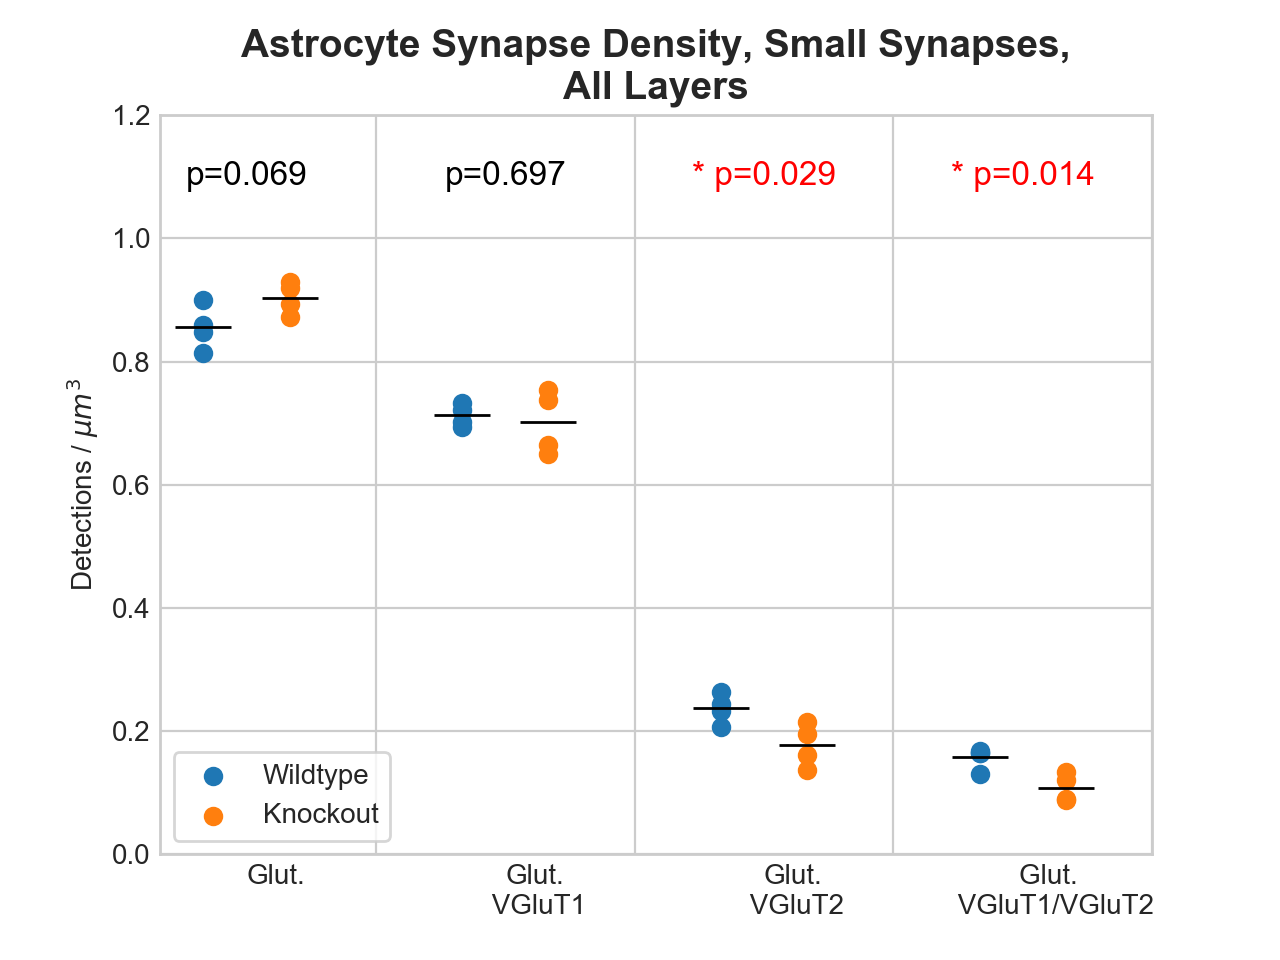

[0.9000071393893188, 0.9285099598881824, 0.7334847404334496, 0.7542889684485616, 0.2636041169987298, 0.21505552320204788, 0.16819816480732505, 0.13350003207008054]


<IPython.core.display.Javascript object>


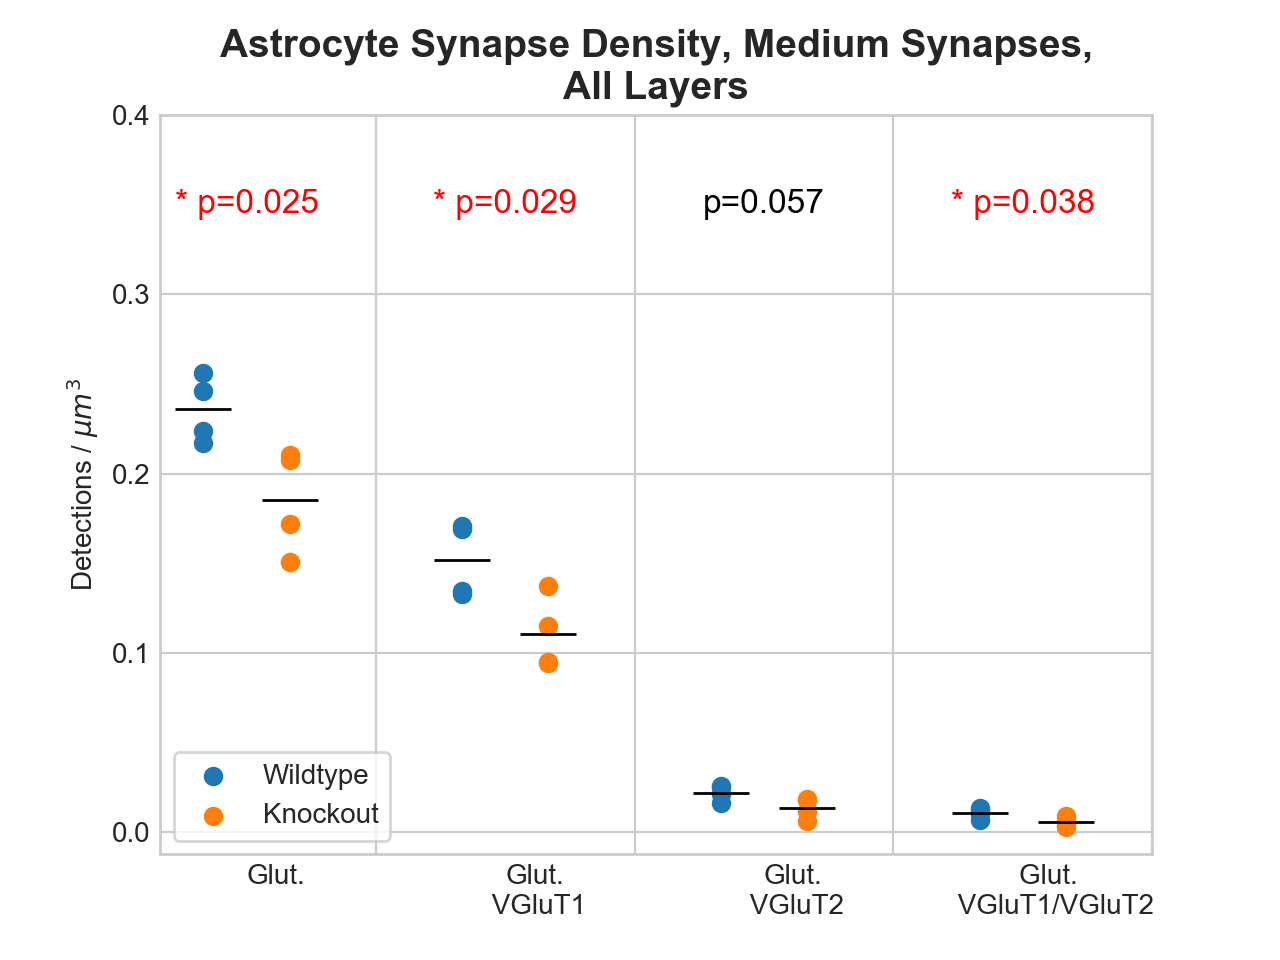

[0.2560267368406928, 0.21033958312427684, 0.17092226948416592, 0.13714794063559752, 0.025675911244768968, 0.018366350334269334, 0.013377234039175156, 0.008987844983692948]


<IPython.core.display.Javascript object>


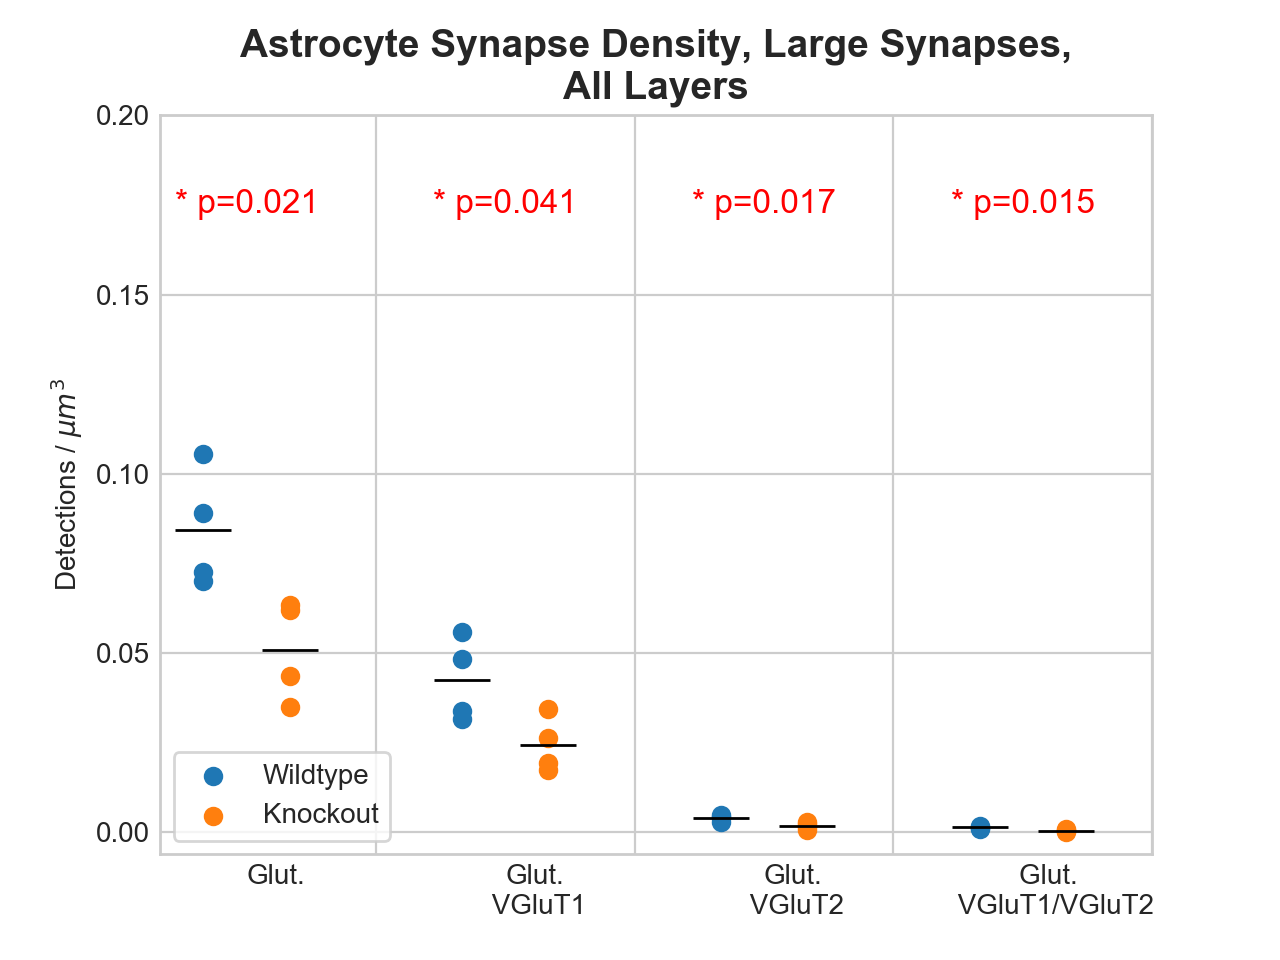

[0.10549732066208627, 0.0633006124482967, 0.05595783123956998, 0.034410385863182125, 0.004980753746135379, 0.002833156583110405, 0.0017471718976420983, 0.0010600187291954011]


<IPython.core.display.Javascript object>


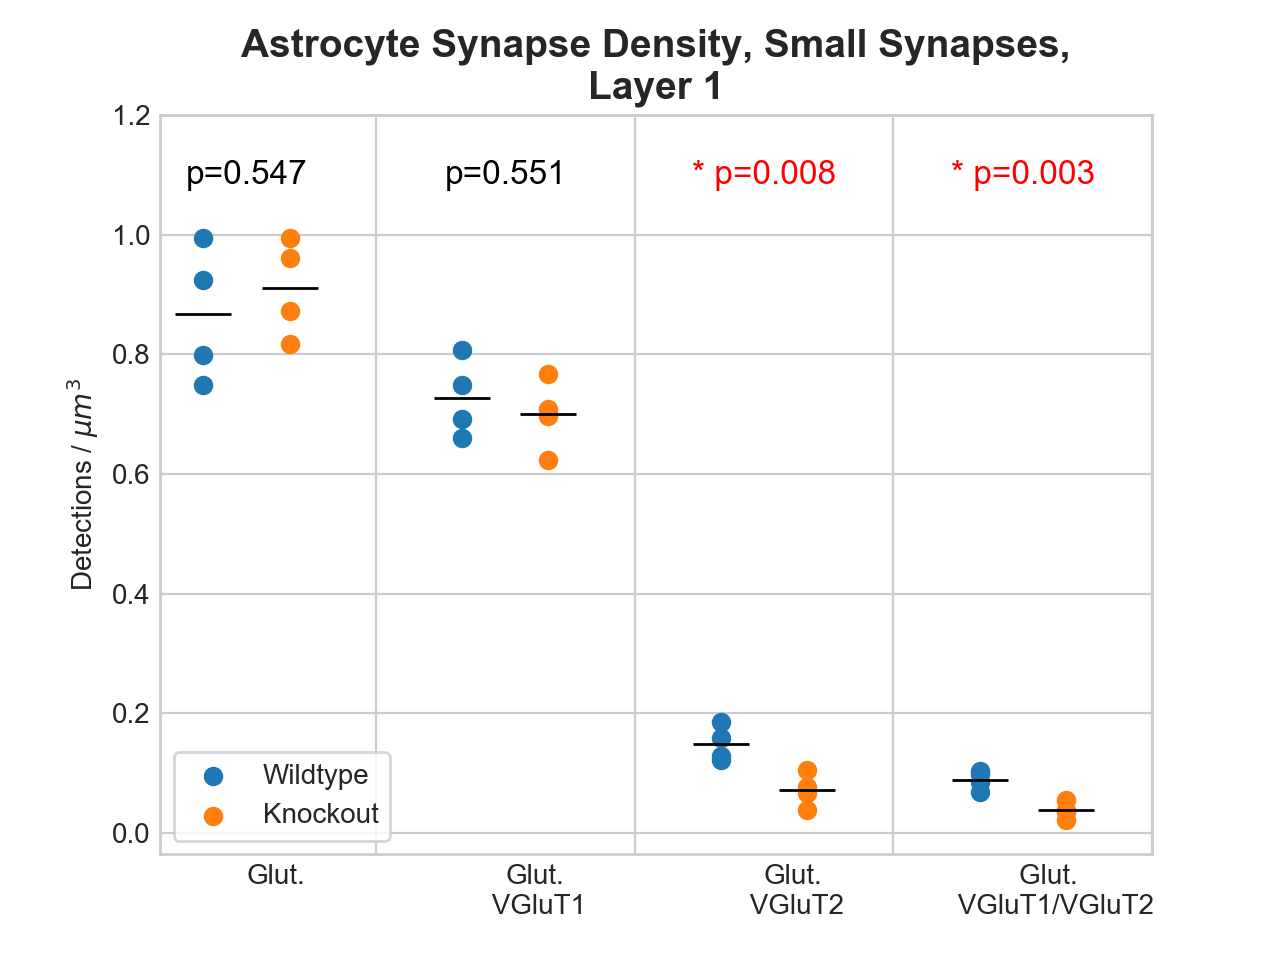

[0.9954433409301391, 0.9945665722970785, 0.8078125772164498, 0.7674796394630321, 0.18500373094225386, 0.10572145055111408, 0.10412143349863057, 0.05461150590607533]


<IPython.core.display.Javascript object>


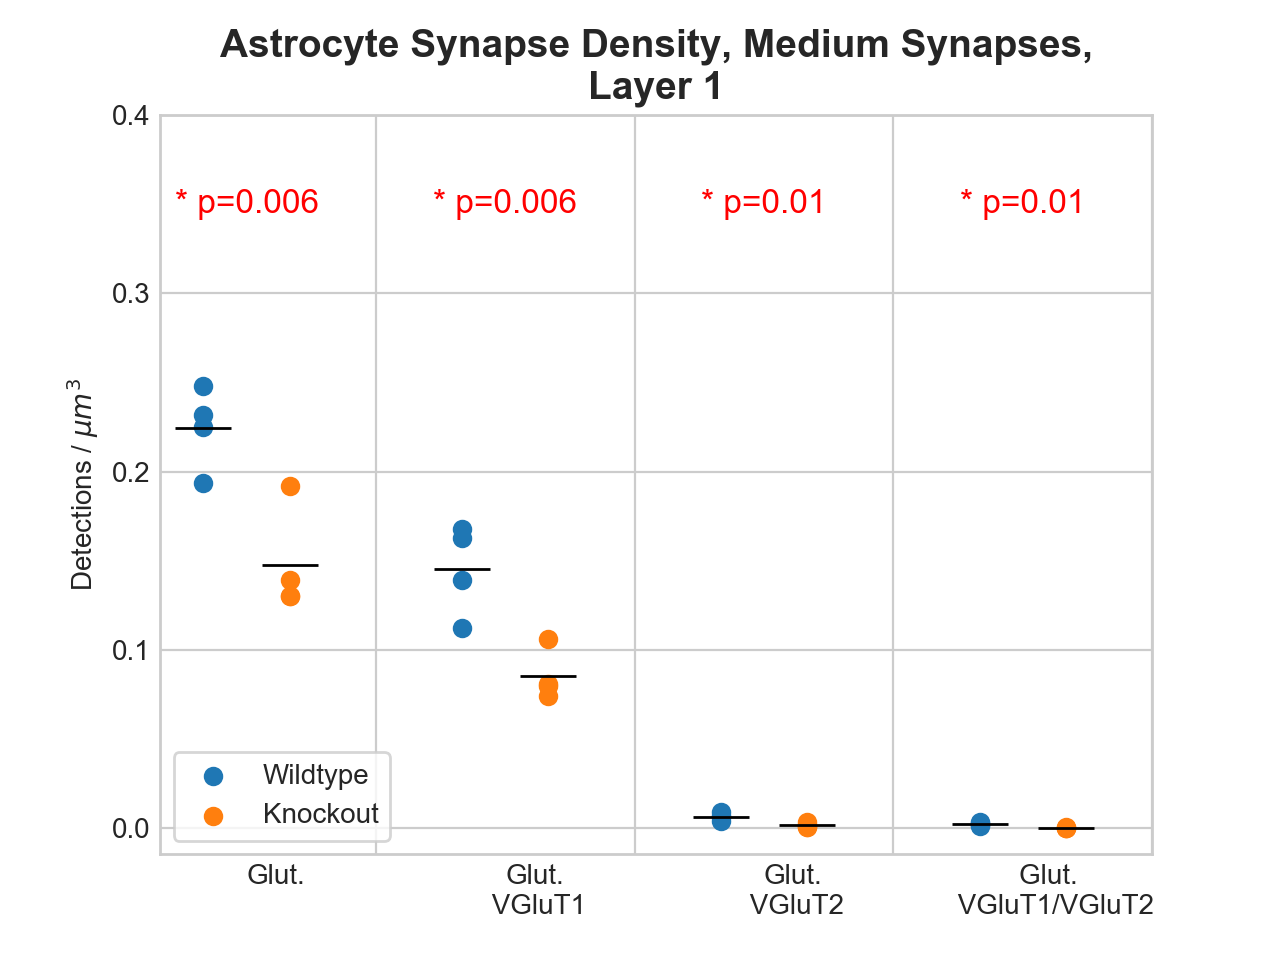

[0.24782424152204452, 0.19187913222175762, 0.16761918761959313, 0.10610694353398054, 0.008954776272059269, 0.0037585565829475376, 0.003556048339084907, 0.00044974181334414987]


<IPython.core.display.Javascript object>


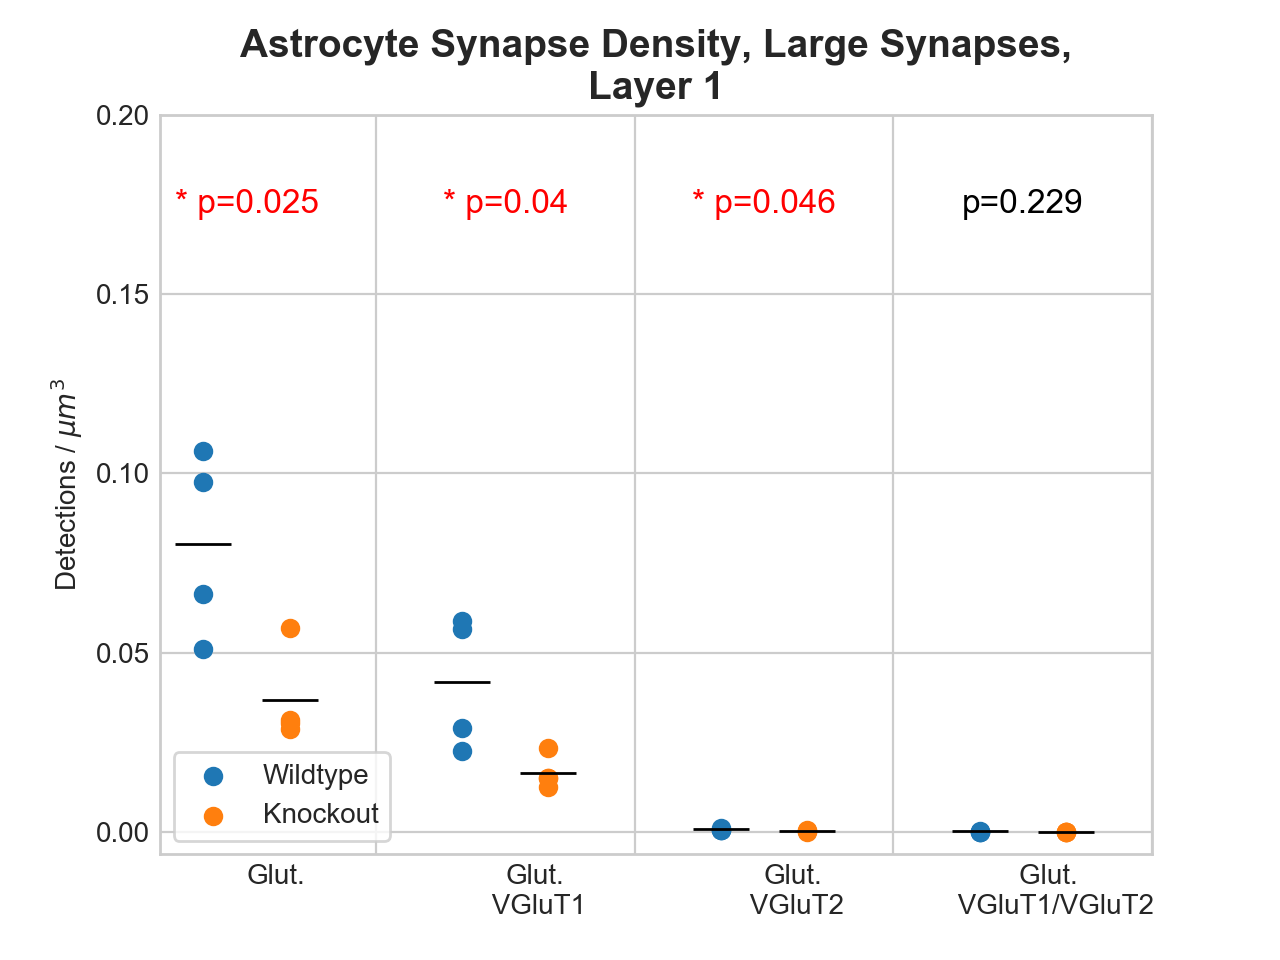

[0.1061965344899447, 0.05676384172707948, 0.05886876386794196, 0.02351507195485126, 0.001066814501725472, 0.000417617398105282, 0.0002262939852144941, 3.212441523886785e-05]


<IPython.core.display.Javascript object>


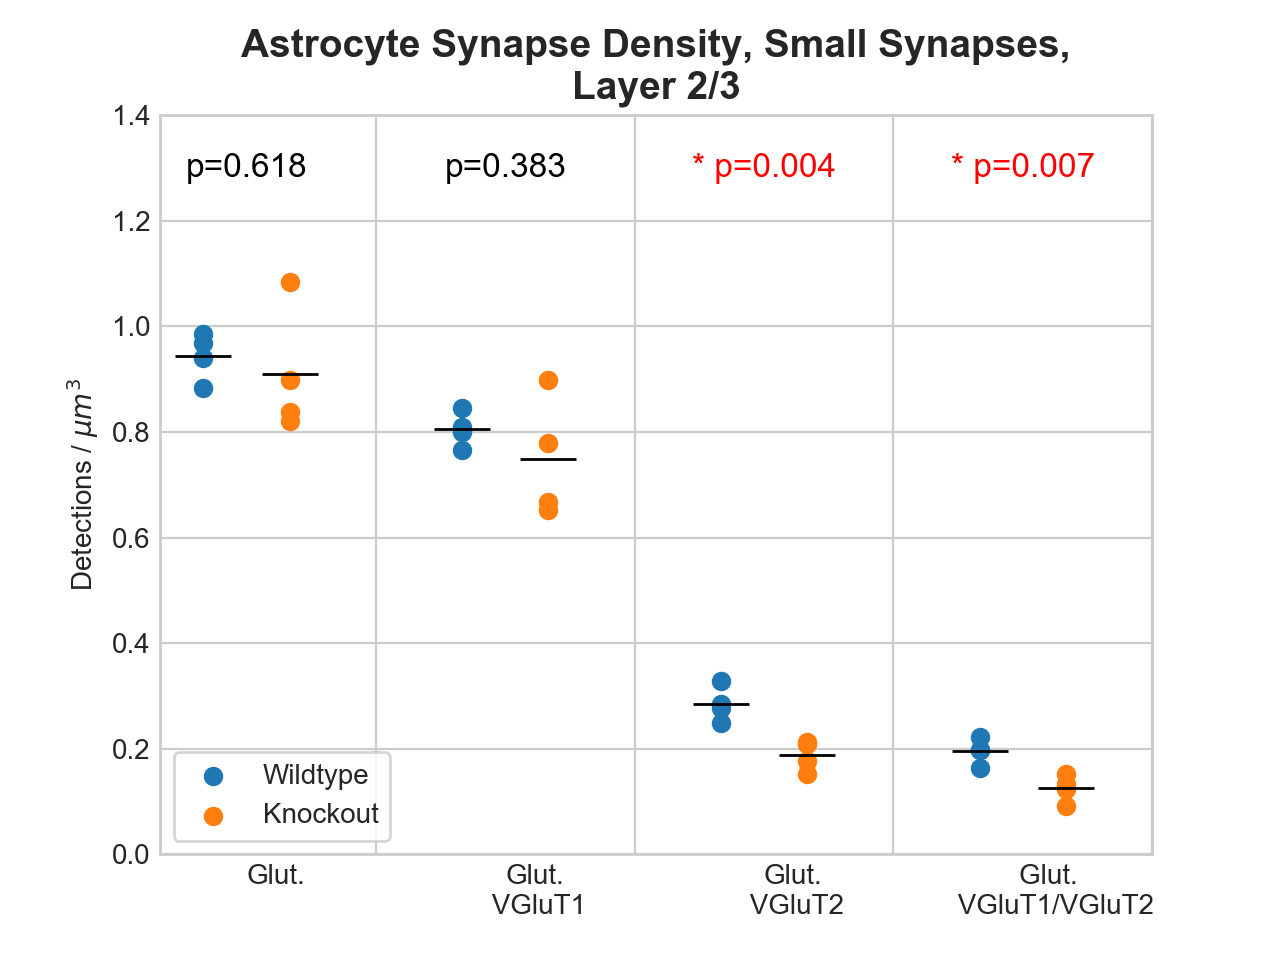

[0.9848422599642979, 1.0841092512335115, 0.8455398467467741, 0.8979253635899942, 0.3293471704113504, 0.21232131087814168, 0.22233509875978452, 0.15246637419082815]


<IPython.core.display.Javascript object>


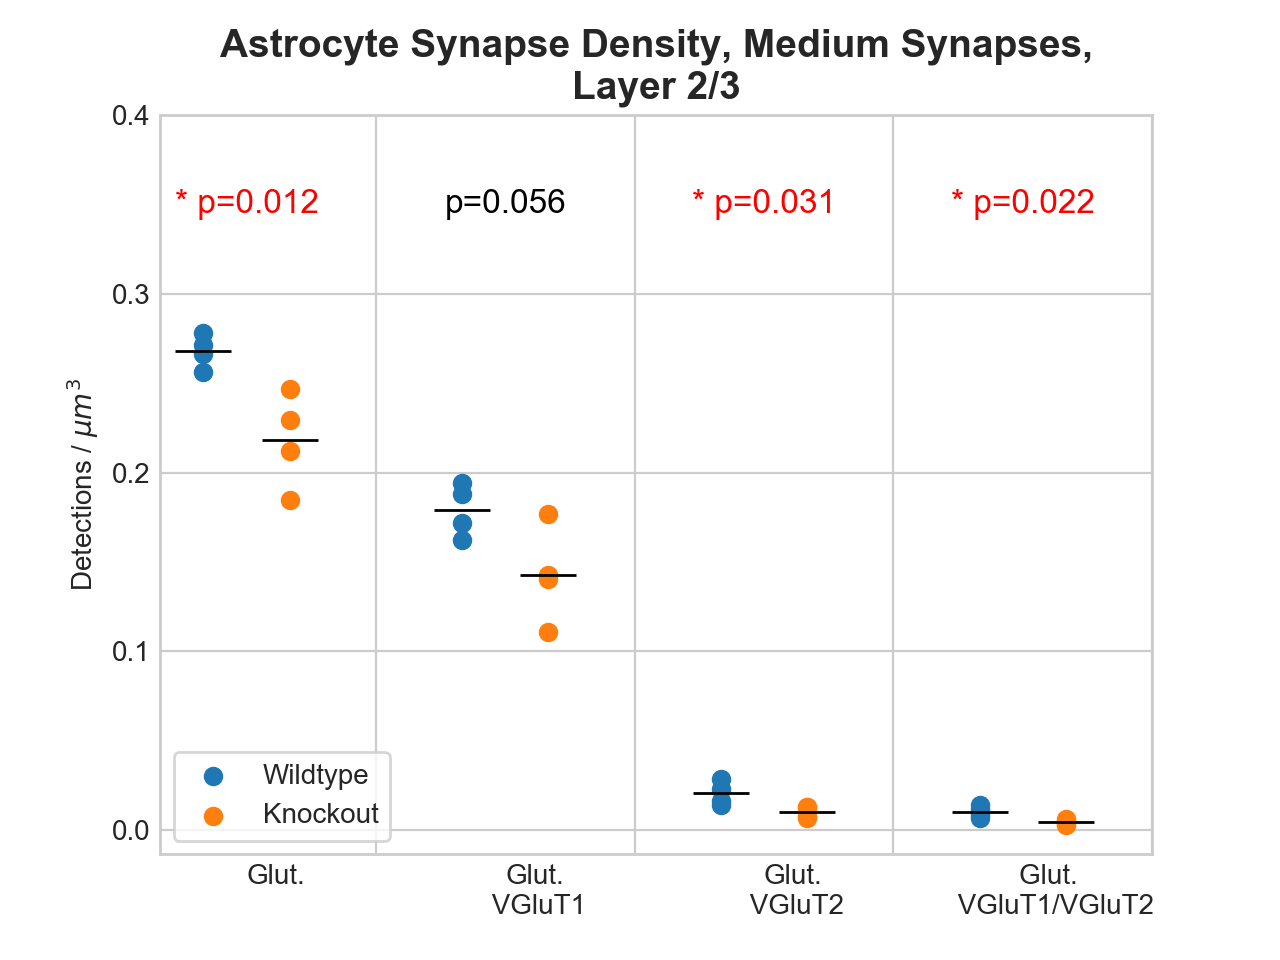

[0.2783676515660005, 0.24672844817132644, 0.19421774259084107, 0.17701813741553057, 0.028552590115926754, 0.013043334475648694, 0.014036814273370623, 0.006157875161658371]


<IPython.core.display.Javascript object>


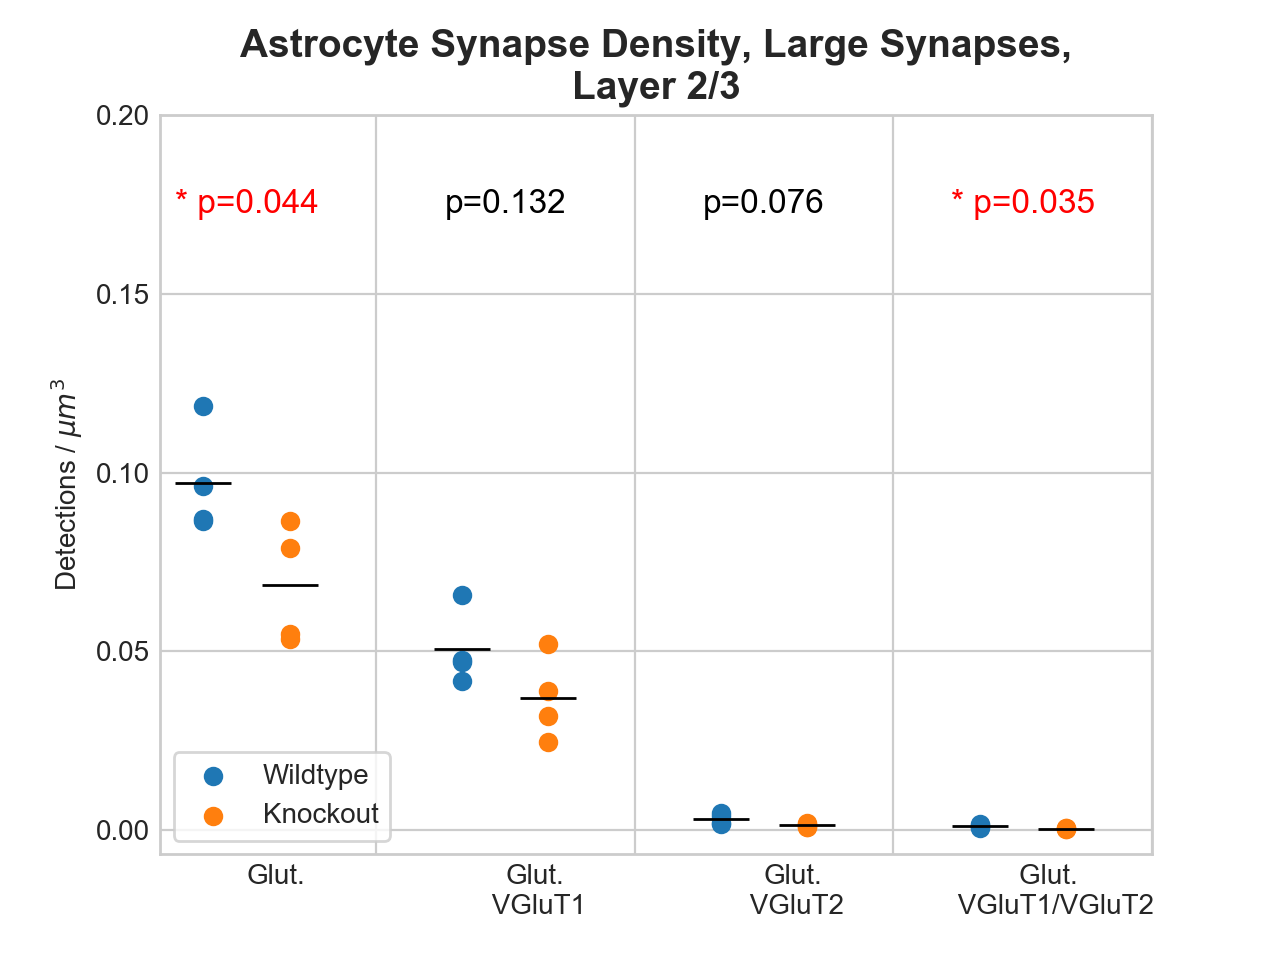

[0.11852893728023631, 0.08651325839704599, 0.06582669904082938, 0.05196006933625723, 0.004809531501422108, 0.0018850147064445881, 0.0015839537471184814, 0.0005756755258987968]


<IPython.core.display.Javascript object>


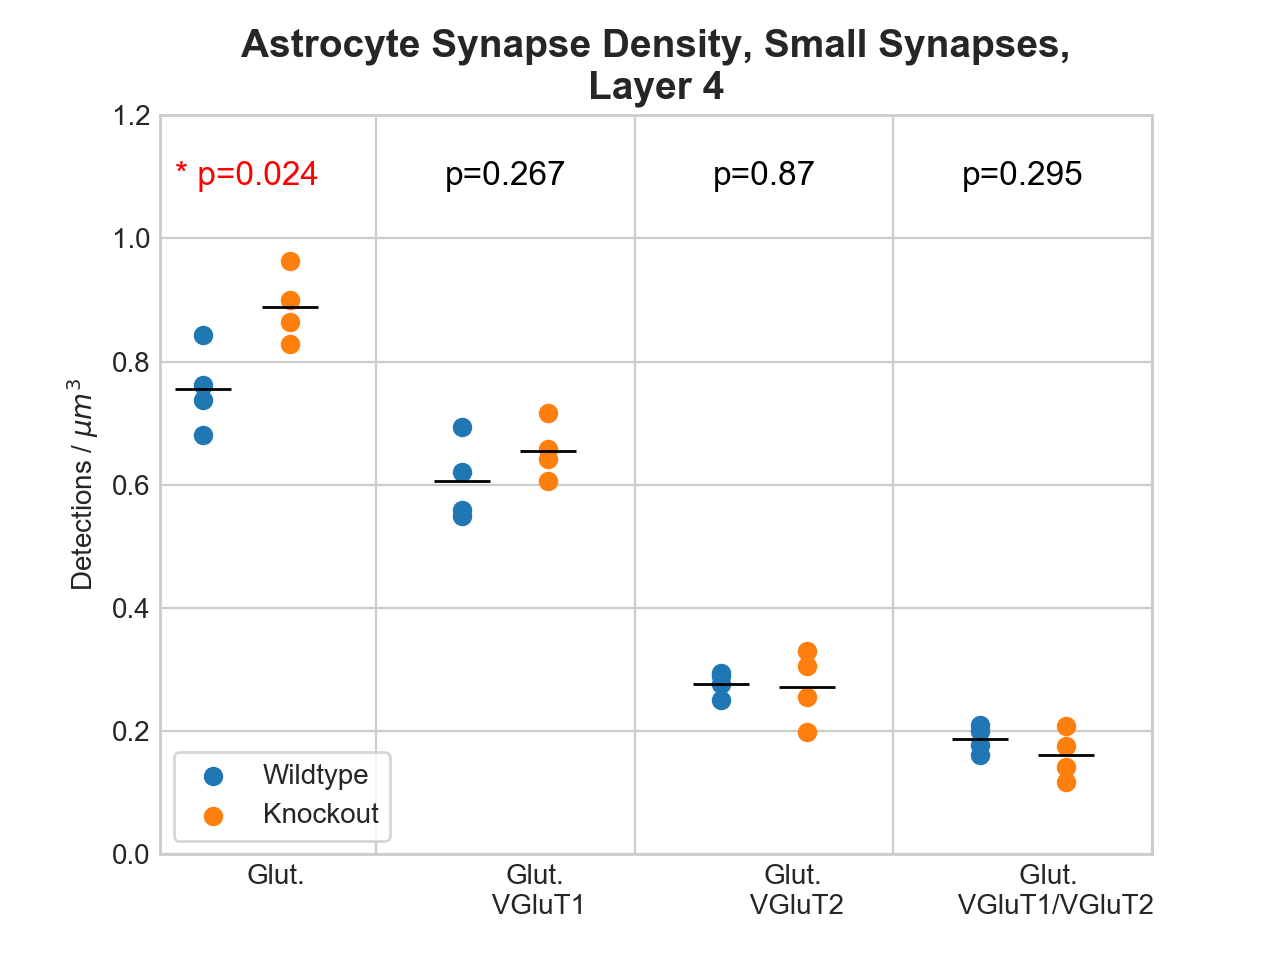

[0.8432102420844689, 0.9627568598330989, 0.6939954964377688, 0.7164851027166047, 0.29379305937177336, 0.3294390290585306, 0.2101740301373755, 0.20892029460111647]


<IPython.core.display.Javascript object>


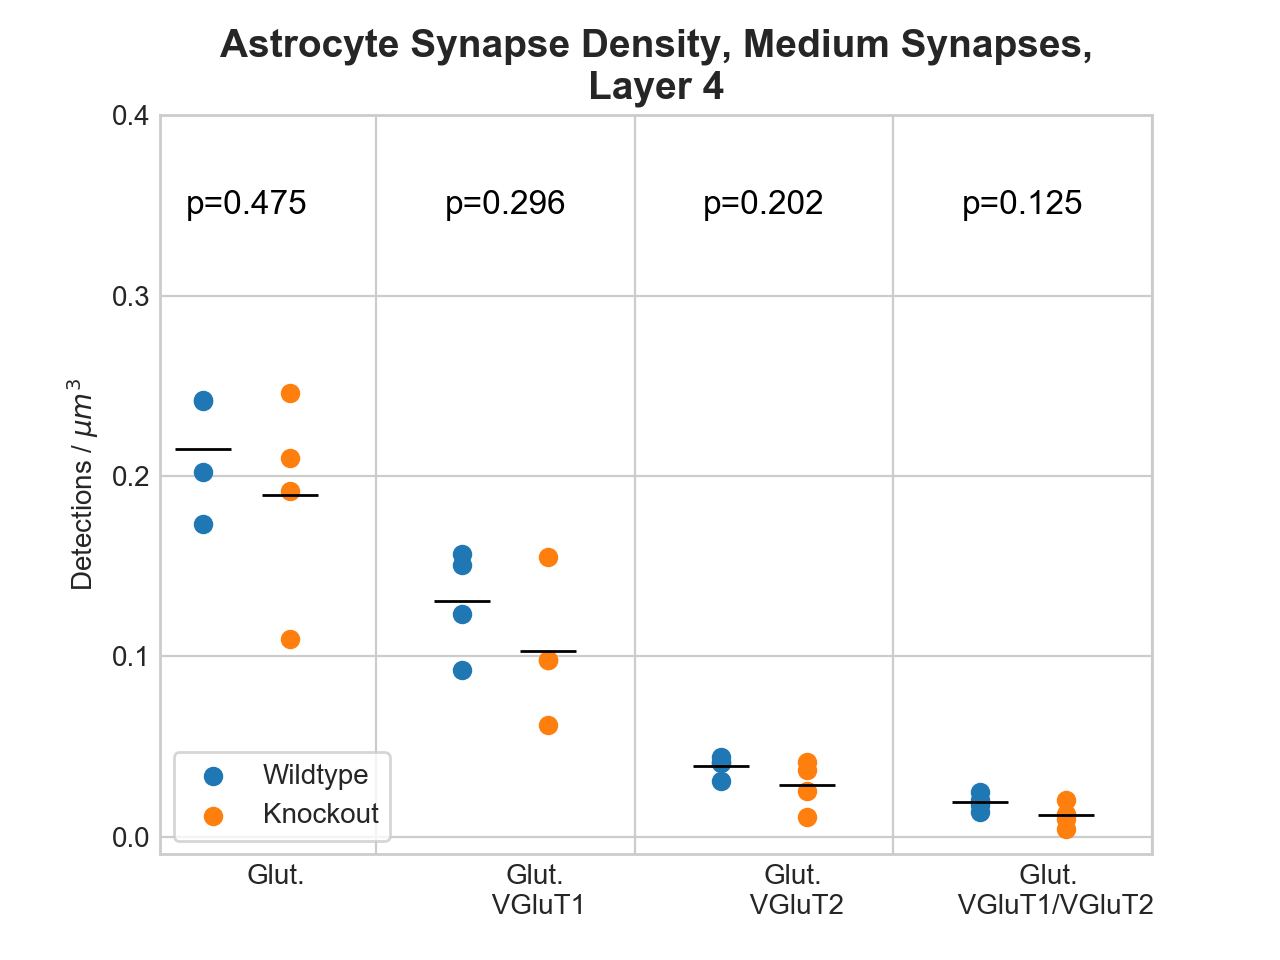

[0.2418883174340334, 0.2460531983263834, 0.15649590281939435, 0.154829486237732, 0.043950949180824386, 0.04152232920233596, 0.024979316440900193, 0.02055668825906849]


<IPython.core.display.Javascript object>


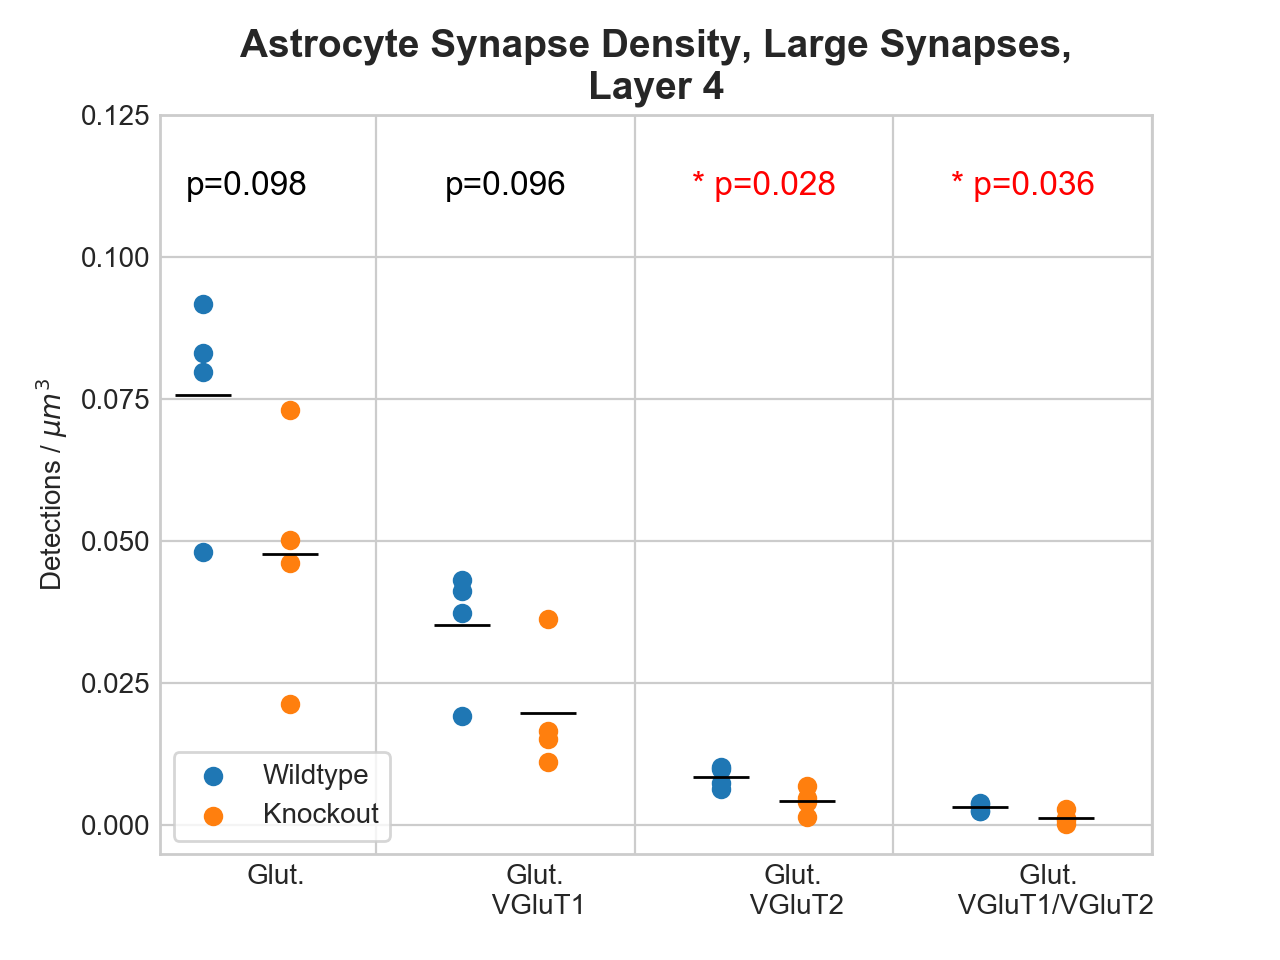

[0.09176649021607777, 0.07303894939793698, 0.04317803080993859, 0.03623320782002921, 0.01008307147473749, 0.006706824020863194, 0.003794326547984839, 0.002780878252553032]


In [81]:
for layer_n, layer_key in enumerate(layer_key_list): 

    for size_n, size_key in enumerate(size_key_list): 

        fig = plt.figure()
        plt.style.use('seaborn-whitegrid')

        x = 0
        x_label_locs = [] 
        layer_error_key = layer_key + '_std_error'
        layer_data_key = layer_key + '_data'
        
        pval_list = [] 
        pval_x_list = []
        pval_y_list = [] 
        
        yticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
        delta_y = 0.2
        
        for query_key in query_keys: 
            wt_mean = avg_layer_wt_mouse[query_key][layer_key][size_key]
            wt_std_e = avg_layer_wt_mouse[query_key][layer_error_key][size_key]
            p0 = plt.plot(x, wt_mean, markersize=20, marker = "_", color='black', label='wildtype')
            xlist = np.ones((4, 1))*x
            wt_data = avg_layer_wt_mouse[query_key][layer_data_key][size_key]
            p0 = plt.scatter(xlist, wt_data, color='C0', label='wildtype')

            ko_mean = avg_layer_ko_mouse[query_key][layer_key][size_key]
            ko_std_e = avg_layer_ko_mouse[query_key][layer_error_key][size_key]
            plt.plot(x+1, ko_mean, markersize=20, marker = "_", color='black', label='knockout')
            xlist = np.ones((4, 1))*(x+1)
            ko_data = avg_layer_ko_mouse[query_key][layer_data_key][size_key]
            p1 = plt.scatter(xlist, ko_data, color='C1', label='knockout')

            #y = max(wt_mean, ko_mean)+0.2    
            pval = layer_avg_pval_dict[query_key][layer_key][size_key]
            #print(pval)
            pval_list.append(pval)
            pval_x_list.append(x+0.5)
            pval_y_list.append(max(wt_data))
            pval_y_list.append(max(ko_data))
            
            x_label_locs.append(x+2)
            x = x + 3

        ax = plt.gca()
        
        y_data = max(pval_y_list)
        if y_data >= 1: 
            y = 1.3
            yticks = yticks14
        elif y_data>=0.8 and y_data<1: 
            y = 1.1
            yticks = yticks12
        elif y_data >= 0.6 and y_data<0.8: 
            y = 0.9
            yticks = yticks10
        elif y_data >=0.4 and y_data<0.6: 
            y = 0.7 
            yticks = yticks08
        elif y_data >=0.3 and y_data<0.4: 
            y = 0.45
            yticks = yticks05
        elif y_data >=0.2 and y_data < 0.3: 
            y = 0.35
            yticks = yticks04
        elif y_data >=0.15 and y_data <0.2: 
            y = 0.225
            yticks = yticks025
        elif y_data >=0.1 and y_data < 0.15: 
            y =0.175
            yticks = yticks02
        elif y_data > 0 and y_data < 0.1: 
            y = 0.1125
            yticks = yticks0125
        
        
        for p_n, pval in enumerate(pval_list): 
            pval_str = str(round(pval, 3))
            if pval < 0.05: 
                plt.text(pval_x_list[p_n], y, "* p=" + pval_str, color='red', fontsize=12, 
                         verticalalignment='center', horizontalalignment='center')
            else:
                plt.text(pval_x_list[p_n], y, 'p='+pval_str, color='black', fontsize=12,
                         verticalalignment='center', horizontalalignment='center')

        plt.title('Astrocyte Synapse Density, '+ size_title_list[size_n]+' Synapses,\n' + layer_title_list[layer_n], 
                  fontsize=14, fontweight='bold')
        plt.ylabel('Detections / $\mu m^3$')

        plt.xticks(x_label_locs, xlabels) 
        plt.legend([p0, p1], ['Wildtype', 'Knockout'], frameon=True, loc='lower left')
        plt.yticks(yticks)
        
        
        dx = -36/72.; dy = 0/72. 
        offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

        # apply offset transform to all x ticklabels.
        for label in ax.xaxis.get_majorticklabels():
            label.set_transform(label.get_transform() + offset)

        plt.savefig('figs/synapse-astro-figs/astrodensity_' + 
                    layer_fn_list[layer_n] + '_' + size_fn_list[size_n] + '.png',
                    dpi=300, bbox_inches='tight')

In [43]:
np.ceil(1.0285099598881824*10)/10

1.1

In [74]:
yticks0125

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125])

In [75]:
(0.1 +0.125)/2


0.1125

In [16]:
# Load normal excitatory synapses

In [17]:
list_of_mice = []
mice_dict = {} 

name = '2ss'
fn = '/Users/anish/Documents/yi_mice/excel/2ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_2ss = fxs_mouse(name)
mouse_2ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_2ss)
mice_dict[name] = mouse_2ss

name = '3ss'
fn = '/Users/anish/Documents/yi_mice/excel/3ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'KO'
mouse_3ss = fxs_mouse(name)
mouse_3ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_3ss)
mice_dict[name] = mouse_3ss


name = '4ss'
fn = '/Users/anish/Documents/yi_mice/excel/4ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_4ss = fxs_mouse(name)
mouse_4ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_4ss)
mice_dict[name] = mouse_4ss


name = '5ss'
fn = '/Users/anish/Documents/yi_mice/excel/5ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_5ss = fxs_mouse(name)
mouse_5ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_5ss)
mice_dict[name] = mouse_5ss


name = '6ss'
fn = '/Users/anish/Documents/yi_mice/excel/6ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_6ss = fxs_mouse(name)
mouse_6ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_6ss)
mice_dict[name] = mouse_6ss


name = '7ss'
fn = '/Users/anish/Documents/yi_mice/excel/7ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_7ss = fxs_mouse(name)
mouse_7ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_7ss)
mice_dict[name] = mouse_7ss


name = '1ss'
fn = '/Users/anish/Documents/yi_mice/excel/1ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_1ss = fxs_mouse(name)
mouse_1ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_1ss)
mice_dict[name] = mouse_1ss


name = '22ss'
fn = '/Users/anish/Documents/yi_mice/excel/22ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_22ss = fxs_mouse(name)
mouse_22ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_22ss)
mice_dict[name] = mouse_22ss


# Add small synapses (1slice-2slice to the calculations)
mouse_2ss = fxsdata.compute_small_synapses(mouse_2ss)
mouse_3ss = fxsdata.compute_small_synapses(mouse_3ss)
mouse_4ss = fxsdata.compute_small_synapses(mouse_4ss)
mouse_5ss = fxsdata.compute_small_synapses(mouse_5ss)
mouse_6ss = fxsdata.compute_small_synapses(mouse_6ss)
mouse_7ss = fxsdata.compute_small_synapses(mouse_7ss)
mouse_1ss = fxsdata.compute_small_synapses(mouse_1ss)
mouse_22ss = fxsdata.compute_small_synapses(mouse_22ss)


# Add medium synapses (1slice-2slice to the calculations)
mouse_2ss = fxsdata.compute_medium_synapses(mouse_2ss)
mouse_3ss = fxsdata.compute_medium_synapses(mouse_3ss)
mouse_4ss = fxsdata.compute_medium_synapses(mouse_4ss)
mouse_5ss = fxsdata.compute_medium_synapses(mouse_5ss)
mouse_6ss = fxsdata.compute_medium_synapses(mouse_6ss)
mouse_7ss = fxsdata.compute_medium_synapses(mouse_7ss)
mouse_1ss = fxsdata.compute_medium_synapses(mouse_1ss)
mouse_22ss = fxsdata.compute_medium_synapses(mouse_22ss)





36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
36 48
24 36
12 24
0 12


In [18]:
query_list = ['q0', 'q1', 'q2', 'q3']

In [19]:
ratio_mouse_1ss = fxsdata.divide_mouse(mouse_1ss, astro_mouse_1ss, query_list)
ratio_mouse_2ss = fxsdata.divide_mouse(mouse_2ss, astro_mouse_2ss, query_list)
ratio_mouse_3ss = fxsdata.divide_mouse(mouse_3ss, astro_mouse_3ss, query_list)
ratio_mouse_4ss = fxsdata.divide_mouse(mouse_4ss, astro_mouse_4ss, query_list)
ratio_mouse_5ss = fxsdata.divide_mouse(mouse_5ss, astro_mouse_5ss, query_list)
ratio_mouse_6ss = fxsdata.divide_mouse(mouse_6ss, astro_mouse_6ss, query_list)
ratio_mouse_7ss = fxsdata.divide_mouse(mouse_7ss, astro_mouse_7ss, query_list)
ratio_mouse_22ss = fxsdata.divide_mouse(mouse_22ss, astro_mouse_22ss, query_list)

In [20]:
ratio_mouse_22ss.region_data[0].all_queries['q0'][1]

0.6888416635282723

In [21]:
# Create Dataframes

In [22]:
# Create dataframes 
df_2 = fxsdata.create_ratio_df(ratio_mouse_2ss, row_labels)
df_3 = fxsdata.create_ratio_df(ratio_mouse_3ss, row_labels)

df_4 = fxsdata.create_ratio_df(ratio_mouse_4ss, row_labels)
df_6 = fxsdata.create_ratio_df(ratio_mouse_6ss, row_labels)

df_5 = fxsdata.create_ratio_df(ratio_mouse_5ss, row_labels)
df_7 = fxsdata.create_ratio_df(ratio_mouse_7ss, row_labels)

df_22 = fxsdata.create_ratio_df(ratio_mouse_22ss, row_labels)
df_1 =  fxsdata.create_ratio_df(ratio_mouse_1ss, row_labels)

In [23]:
dflist = [df_2, df_3, df_4, df_6, df_5, df_7, df_22, df_1]

In [24]:
ratio_wt_mouse_list = [ratio_mouse_2ss, ratio_mouse_4ss, ratio_mouse_5ss, ratio_mouse_22ss]
mouse_name = 'wildtype'
ratio_wt_mouse = fxsdata.average_mice(ratio_wt_mouse_list, mouse_name, row_labels)

ratio_ko_mouse_list = [ratio_mouse_3ss, ratio_mouse_6ss, ratio_mouse_7ss, ratio_mouse_1ss]
mouse_name = 'knockout'
ratio_ko_mouse = fxsdata.average_mice(ratio_ko_mouse_list, mouse_name, row_labels)

In [25]:
for slicespan in range(0, 4): 
    mouse_name = 'average wildtype, z=' + str(slicespan)
    wt_df = fxsdata.average_mouse_to_df(ratio_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average knockout, z=' + str(slicespan)
    ko_df = fxsdata.average_mouse_to_df(ratio_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    pval_df = fxsdata.create_pval_df(query_list, slicespan, ratio_ko_mouse_list, ratio_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(wt_df)
    dflist.append(ko_df)
    dflist.append(pval_df)

## AVERAGE LAYERS

In [27]:
query_list = ['Q0', 'Q1', 'Q2', 'Q3']

# Average Layers

# Add small synapses (1slice-2slice to the calculations)
avg_layer_mouse_2ss = fxsdata.average_mouse_layers(ratio_mouse_2ss, query_list)
avg_layer_mouse_3ss = fxsdata.average_mouse_layers(ratio_mouse_3ss, query_list)
avg_layer_mouse_4ss = fxsdata.average_mouse_layers(ratio_mouse_4ss, query_list)
avg_layer_mouse_5ss = fxsdata.average_mouse_layers(ratio_mouse_5ss, query_list)
avg_layer_mouse_6ss = fxsdata.average_mouse_layers(ratio_mouse_6ss, query_list)
avg_layer_mouse_7ss = fxsdata.average_mouse_layers(ratio_mouse_7ss, query_list)
avg_layer_mouse_1ss = fxsdata.average_mouse_layers(ratio_mouse_1ss, query_list)
avg_layer_mouse_22ss = fxsdata.average_mouse_layers(ratio_mouse_22ss, query_list)

query_list

avg_layer_wt_mouse_list = [avg_layer_mouse_2ss, avg_layer_mouse_4ss, avg_layer_mouse_5ss, avg_layer_mouse_22ss]
mouse_name = 'wildtype'
avg_layer_wt_mouse = fxsdata.average_layer_mice(avg_layer_wt_mouse_list, mouse_name, row_labels)

avg_layer_ko_mouse_list = [avg_layer_mouse_3ss, avg_layer_mouse_6ss, avg_layer_mouse_7ss, avg_layer_mouse_1ss]
mouse_name = 'knockout'
avg_layer_ko_mouse = fxsdata.average_layer_mice(avg_layer_ko_mouse_list, mouse_name, row_labels)


layer_key = 'average'

for slicespan in range(0, 4): 
    mouse_name = 'average layer wildtype, z=' + str(slicespan)
    avg_layer_wt_df = fxsdata.average_layer_mice_to_df(avg_layer_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average layer knockout, z=' + str(slicespan)
    avg_layer_ko_df = fxsdata.average_layer_mice_to_df(avg_layer_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    avg_layer_pval_df = fxsdata.create_layer_avg_pval_df(query_list, layer_key, slicespan, avg_layer_ko_mouse_list, avg_layer_wt_mouse_list, df_name, 'unpaired')
    
    dflist.append(avg_layer_wt_df)
    dflist.append(avg_layer_ko_df)
    dflist.append(avg_layer_pval_df)

In [28]:
fxsdata.write_dfs_to_excel(dflist, 'values', 'excit_astro_ratio_med_unpaired.xlsx')


2ss-WT
3ss-KO
4ss-WT
6ss-KO
5ss-WT
7ss-KO
22ss-WT
1ss-KO
average wildtype, z=0
average knockout, z=0
p-values, z=0
average wildtype, z=1
average knockout, z=1
p-values, z=1
average wildtype, z=2
average knockout, z=2
p-values, z=2
average wildtype, z=3
average knockout, z=3
p-values, z=3
average layer wildtype, z=0
average layer knockout, z=0
p-values, z=0
average layer wildtype, z=1
average layer knockout, z=1
p-values, z=1
average layer wildtype, z=2
average layer knockout, z=2
p-values, z=2
average layer wildtype, z=3
average layer knockout, z=3
p-values, z=3
